## This notebook will examine the Outdoor Temperature Measurments from the UW ATMS Building 

https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=UWASH&hour1=20&min1=48&timetype=LOCAL&unit=0&graph=0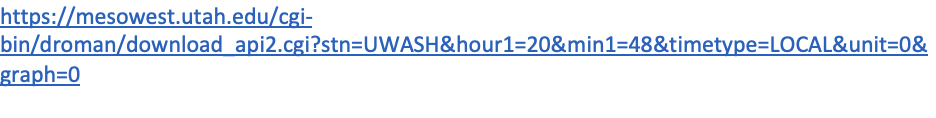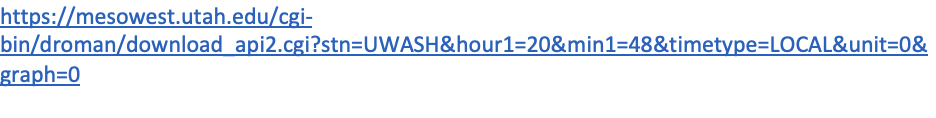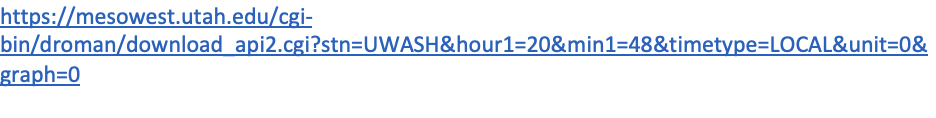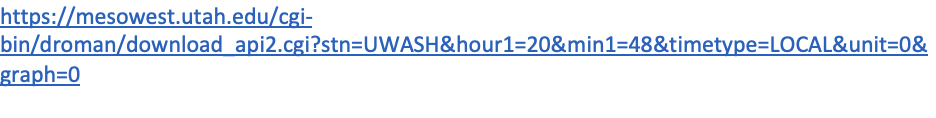

In [156]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

In [157]:
UWASH= pd.read_csv("UWASH.csv", sep=',', header=[10])

In [158]:
list(UWASH.columns)

['Station_ID',
 'Date_Time',
 'air_temp_set_1',
 'relative_humidity_set_1',
 'wind_speed_set_1',
 'wind_direction_set_1',
 'wind_gust_set_1',
 'precip_accum_set_1',
 'sea_level_pressure_set_1',
 'dew_point_temperature_set_1d',
 'wind_chill_set_1d',
 'wind_cardinal_direction_set_1d',
 'heat_index_set_1d']

In [159]:
UWASH= UWASH.drop(0,axis=0)

In [164]:
UWASH.Date_Time= pd.to_datetime(UWASH.Date_Time)

cols = UWASH.columns.drop(['Date_Time','wind_cardinal_direction_set_1d'])

UWASH[cols] = UWASH[cols].apply(pd.to_numeric, errors='coerce')

UWASH.head(5)

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,precip_accum_set_1,sea_level_pressure_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d
1,NaN,2022-06-01 12:55:00+00:00,12.22,85.0,2.06,228.0,3.09,NaN,101600.0,9.75,NaN,SW,NaN
2,NaN,2022-06-01 13:55:00+00:00,13.89,81.0,1.03,336.0,4.12,NaN,101610.0,10.65,NaN,NNW,NaN
3,NaN,2022-06-01 14:55:00+00:00,15.00,77.0,1.54,98.0,3.09,NaN,101590.0,10.97,NaN,E,NaN
4,NaN,2022-06-01 15:55:00+00:00,16.11,71.0,1.54,37.0,3.09,NaN,101570.0,10.81,NaN,NE,NaN
5,NaN,2022-06-01 16:55:00+00:00,16.67,71.0,3.09,200.0,4.63,NaN,101550.0,11.35,NaN,SSW,NaN


In [163]:
UWASH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 1 to 3111
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Station_ID                      0 non-null      float64            
 1   Date_Time                       3111 non-null   datetime64[ns, UTC]
 2   air_temp_set_1                  3111 non-null   float64            
 3   relative_humidity_set_1         2903 non-null   float64            
 4   wind_speed_set_1                3111 non-null   float64            
 5   wind_direction_set_1            3111 non-null   float64            
 6   wind_gust_set_1                 3111 non-null   float64            
 7   precip_accum_set_1              176 non-null    float64            
 8   sea_level_pressure_set_1        2689 non-null   float64            
 9   dew_point_temperature_set_1d    2903 non-null   float64            
 10  wind_chill_s

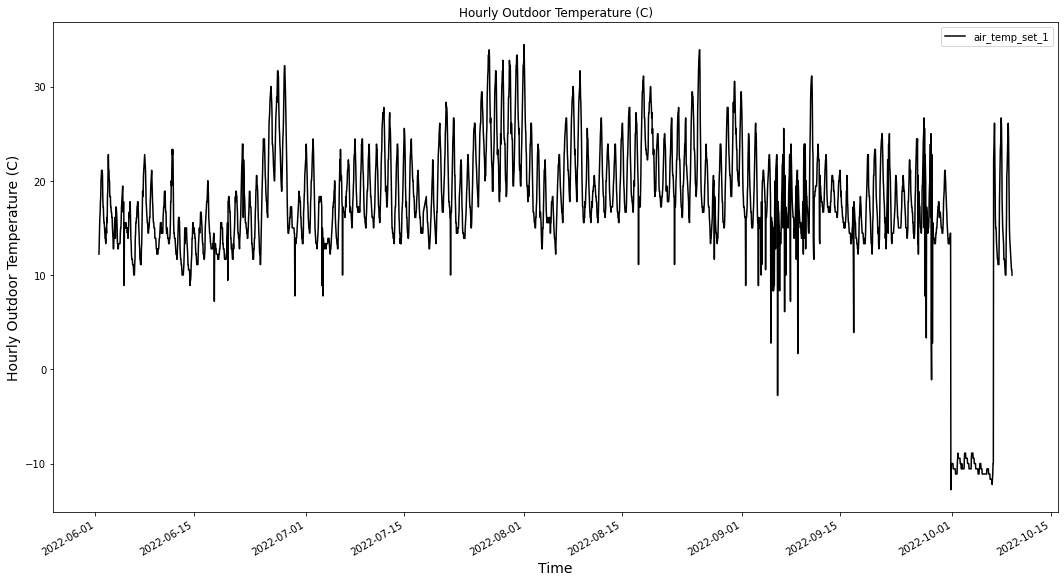

In [165]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Hourly Outdoor Temperature (C)')

UWASH.plot(x='Date_Time', y='air_temp_set_1',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Hourly Outdoor Temperature (C)",color='k',fontsize=14);

#UWASH.plot(x='Date_Time', y='relative_humidity_set_1', color='dodgerblue', marker='*', markerfacecolor='white', ax=ax2)

#ax2.set_ylabel("Hourly Relative Humidity (%)",fontsize=14, color='dodgerblue');
#ax2.get_legend().remove()
#ax.get_legend().remove()
#ax2.invert_yaxis()
#ax2.set_ylim(-20,30)

#plt.show();